## Project 1 - Group 11
### Aditya Mohan Kakde, Venkata Subrahmanya Ankit Vennelakanti, Venkata Krishnan Ravichandran
#### Task 2 - World Indicators 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
world_df = pd.read_csv('/content/drive/MyDrive/IE5374 Workspace/Colab Notebooks/Project_1/World Indicators.csv')
world_df

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,NaN,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907,The Americas,Turks and Caicos Islands
204,0.013,46.5%,5.0,2191193.0,"$15,533,800,000,000",0.177,"$8,467",187.0,0.006,0.7,0.033,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,41.9%,7.0,4430.0,"$47,236,710,623",0.088,"$1,213",336.0,0.010,0.5,0.098,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay
206,0.020,62.8%,141.0,70198.0,"$316,482,176,579",0.045,$487,864.0,0.014,0.4,0.172,77.0,71.0,1.0,0.291,0.651,0.058,0.888,The Americas,"Venezuela, RB"


In [ ]:
# Drop the %, $ and , symbol in the columns of interest.



world_df['Business Tax Rate'] = world_df['Business Tax Rate'].astype(str)
world_df['Business Tax Rate'] = world_df['Business Tax Rate'].map(lambda x:x.rstrip('%'))
world_df['Business Tax Rate'] = world_df['Business Tax Rate'].astype(float)

world_df['GDP'] = world_df['GDP'].str.replace(r"[\$\,]","")
world_df['GDP'] = world_df['GDP'].astype(float)

world_df['Health Exp/Capita'] = world_df['Health Exp/Capita'].str.replace(r"[\$\,]","")
world_df['Health Exp/Capita'] = world_df['Health Exp/Capita'].astype(float)
world_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':


,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,41852.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1,66.0,13576.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9,29.0,3761.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5,60.0,2215.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5,13.0,NaN,1.039576e+10,0.064,39.0,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907,The Americas,Turks and Caicos Islands
204,0.013,46.5,5.0,2191193.0,1.553380e+13,0.177,8467.0,187.0,0.006,0.7,0.033,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,41.9,7.0,4430.0,4.723671e+10,0.088,1213.0,336.0,0.010,0.5,0.098,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay
206,0.020,62.8,141.0,70198.0,3.164822e+11,0.045,487.0,864.0,0.014,0.4,0.172,77.0,71.0,1.0,0.291,0.651,0.058,0.888,The Americas,"Venezuela, RB"


In [ ]:
# Dropping Engergy Usage and Lending Interest as they have majority have NaN values
world_df = world_df.drop(['Energy Usage','Lending Interest'], axis=1)
world_df

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1,66.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9,29.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5,60.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5,13.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907,The Americas,Turks and Caicos Islands
204,0.013,46.5,5.0,1.553380e+13,0.177,8467.0,187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,41.9,7.0,4.723671e+10,0.088,1213.0,336.0,0.010,0.5,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay
206,0.020,62.8,141.0,3.164822e+11,0.045,487.0,864.0,0.014,0.4,77.0,71.0,1.0,0.291,0.651,0.058,0.888,The Americas,"Venezuela, RB"


In [ ]:
world_df.describe()

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban
count,199.000000,181.000000,181.000000,1.880000e+02,185.000000,185.000000,180.000000,188.000000,199.000000,197.000000,197.000000,196.000000,191.000000,191.000000,191.000000,206.000000
mean,0.021759,44.643094,30.331492,3.767045e+11,0.067362,1094.464865,279.283333,0.027340,0.376884,72.746193,68.035533,0.958673,0.286963,0.635550,0.077424,0.576728
std,0.010721,35.988948,56.584357,1.397271e+12,0.028462,1881.466019,247.783296,0.025358,0.284034,10.091750,8.868297,0.431784,0.107775,0.071489,0.052995,0.244372
min,0.008000,8.400000,1.000000,1.707000e+08,0.017000,12.000000,12.000000,0.002000,0.000000,45.000000,45.000000,0.000000,0.119000,0.475000,0.003000,0.089000
25%,0.012000,30.200000,9.000000,6.919676e+09,0.047000,87.000000,151.750000,0.007000,0.100000,67.000000,62.000000,0.700000,0.189000,0.581000,0.034000,0.377750
50%,0.019000,38.800000,18.000000,2.698363e+10,0.065000,311.000000,224.000000,0.016000,0.400000,76.000000,70.000000,1.000000,0.279000,0.654000,0.056000,0.571500
75%,0.028000,48.400000,35.000000,2.027246e+11,0.085000,928.000000,327.000000,0.042250,0.600000,80.000000,75.000000,1.200000,0.382500,0.684500,0.118000,0.772500
max,0.050000,339.100000,694.000000,1.553380e+13,0.177000,9908.000000,2600.000000,0.112000,0.900000,87.000000,81.000000,2.500000,0.499000,0.857000,0.237000,1.000000


#### Histograms to decide imputation method 
#### If balanced histogram is obtained - replace with mean value of the column 
#### If skewed histogram is obtained - replace with median value of the column


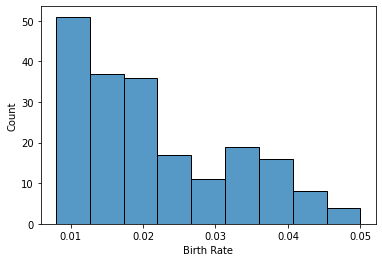

In [ ]:
import seaborn as sns
sns.histplot(world_df['Birth Rate'])

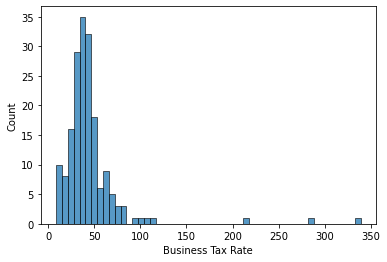

In [ ]:
sns.histplot(world_df['Business Tax Rate'])

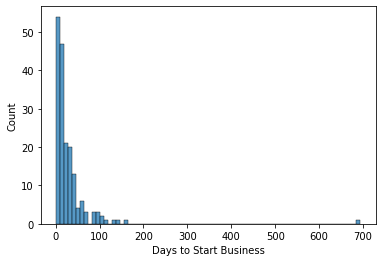

In [ ]:
sns.histplot(world_df['Days to Start Business'])

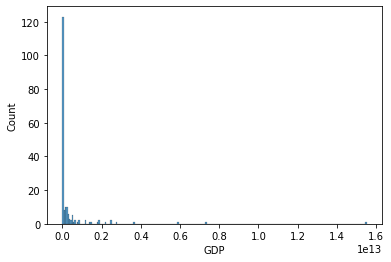

In [ ]:
sns.histplot(world_df['GDP'])

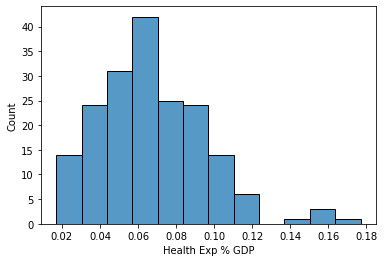

In [ ]:
sns.histplot(world_df['Health Exp % GDP'])

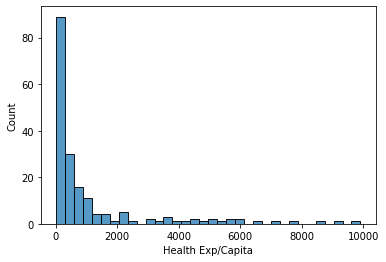

In [ ]:
sns.histplot(world_df['Health Exp/Capita'])

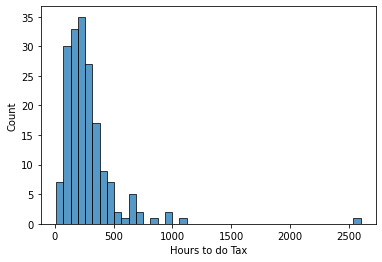

In [ ]:
sns.histplot(world_df['Hours to do Tax'])

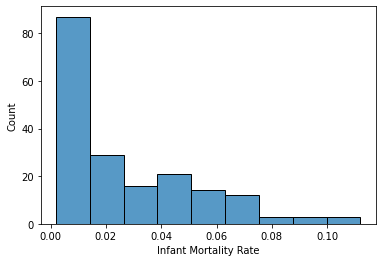

In [ ]:
sns.histplot(world_df['Infant Mortality Rate'])

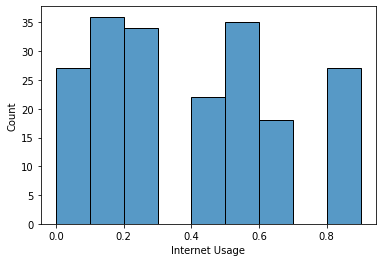

In [ ]:
sns.histplot(world_df['Internet Usage'])

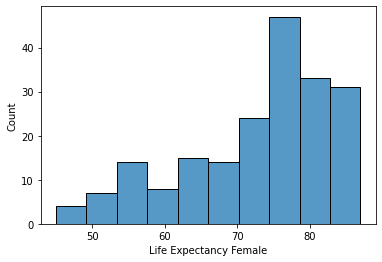

In [ ]:
sns.histplot(world_df['Life Expectancy Female'])

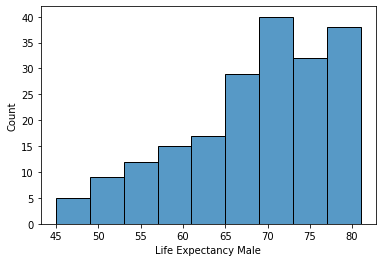

In [ ]:
sns.histplot(world_df['Life Expectancy Male'])

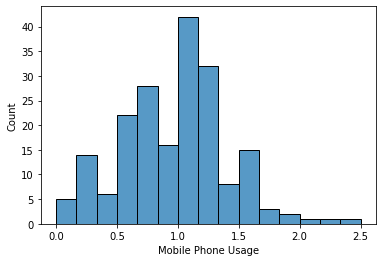

In [ ]:
sns.histplot(world_df['Mobile Phone Usage'])

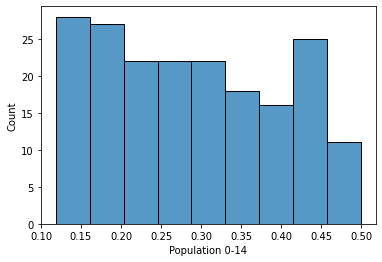

In [ ]:
sns.histplot(world_df['Population 0-14'])

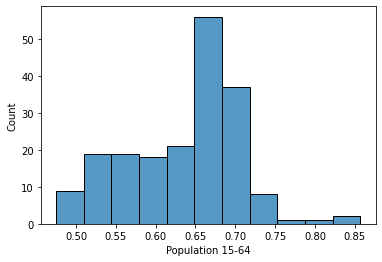

In [ ]:
sns.histplot(world_df['Population 15-64'])

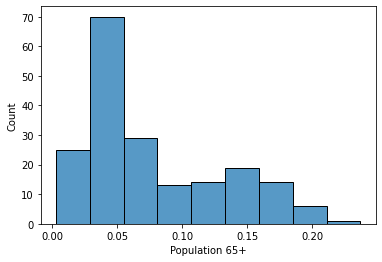

In [ ]:
sns.histplot(world_df['Population 65+'])

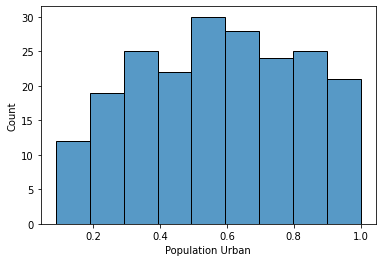

In [ ]:
sns.histplot(world_df['Population Urban'])

In [ ]:
world_df.dtypes

Birth Rate                float64
Business Tax Rate         float64
Days to Start Business    float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Urban          float64
Region                     object
Country                    object
dtype: object

In [ ]:
# Finding the various regions to perform imputation by groups
world_df['Region'].unique()

array(['Africa', 'Asia', 'Europe', 'Middle East', 'Oceania',
       'The Americas'], dtype=object)

In [ ]:
# Grouping data based on Region to perform imputation
world_data_africa = world_df[world_df['Region']=='Africa']
world_data_asia = world_df[world_df['Region']=='Asia']
world_data_europe = world_df[world_df['Region']=='Europe']
world_data_mideast = world_df[world_df['Region']=='Middle East']
world_data_oceania = world_df[world_df['Region']=='Oceania']
world_data_america = world_df[world_df['Region']=='The Americas']

In [ ]:
# Imputations by region - The America
world_data_america['Birth Rate'].fillna(value=world_data_america['Birth Rate'].median(), inplace=True)
world_data_america['Business Tax Rate'].fillna(value=world_data_america['Business Tax Rate'].median(), inplace=True)
world_data_america['Days to Start Business'].fillna(value=world_data_america['Days to Start Business'].median(), inplace=True)

world_data_america['GDP'].fillna(value=world_data_america['GDP'].median(), inplace=True)
world_data_america['Health Exp % GDP'].fillna(value=world_data_america['Health Exp % GDP'].mean(), inplace=True)
world_data_america['Health Exp/Capita'].fillna(value=world_data_america['Health Exp/Capita'].median(), inplace=True)
world_data_america['Hours to do Tax'].fillna(value=world_data_america['Hours to do Tax'].median(), inplace=True)
world_data_america['Infant Mortality Rate'].fillna(value=world_data_america['Infant Mortality Rate'].median(), inplace=True)
world_data_america['Internet Usage'].fillna(value=world_data_america['Internet Usage'].mean(), inplace=True)

world_data_america['Life Expectancy Female'].fillna(value=world_data_america['Life Expectancy Female'].median(), inplace=True)
world_data_america['Life Expectancy Male'].fillna(value=world_data_america['Life Expectancy Male'].median(), inplace=True)
world_data_america['Mobile Phone Usage'].fillna(value=world_data_america['Mobile Phone Usage'].mean(), inplace=True)
world_data_america['Population 0-14'].fillna(value=world_data_america['Population 0-14'].mean(), inplace=True)
world_data_america['Population 15-64'].fillna(value=world_data_america['Population 15-64'].mean(), inplace=True)
world_data_america['Population 65+'].fillna(value=world_data_america['Population 65+'].median(), inplace=True)
world_data_america['Population Urban'].fillna(value=world_data_america['Population Urban'].mean(), inplace=True)
world_data_america

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
163,0.017,41.0,21.0,1.127037e+09,0.055000,703.0,207.0,0.008,0.500000,78.0,73.0,2.000000,0.258000,0.670000,0.072,0.257,The Americas,Antigua and Barbuda
164,0.017,107.7,25.0,5.577273e+11,0.079000,866.0,415.0,0.013,0.500000,80.0,72.0,1.500000,0.246000,0.646000,0.107,0.911,The Americas,Argentina
165,0.011,41.2,19.0,2.584464e+09,0.073143,487.0,245.0,0.014,0.700000,78.0,73.0,1.094872,0.204000,0.689000,0.107,0.427,The Americas,Aruba
166,0.015,46.6,24.0,7.872584e+09,0.075000,1622.0,58.0,0.011,0.700000,78.0,72.0,0.800000,0.220000,0.708000,0.072,0.826,The Americas,"Bahamas, The"
167,0.013,41.1,18.0,4.368900e+09,0.072000,935.0,245.0,0.014,0.700000,77.0,73.0,1.200000,0.191000,0.704000,0.105,0.319,The Americas,Barbados
168,0.024,33.2,44.0,1.489000e+09,0.058000,264.0,147.0,0.015,0.200000,77.0,71.0,0.700000,0.349000,0.612000,0.039,0.447,The Americas,Belize
169,0.012,41.2,19.0,5.550771e+09,0.073143,487.0,245.0,0.014,0.900000,82.0,77.0,1.094872,0.270405,0.649541,0.070,1.000,The Americas,Bermuda
170,0.026,80.0,49.0,2.394854e+10,0.050000,115.0,1080.0,0.033,0.300000,69.0,65.0,0.800000,0.356000,0.596000,0.048,0.669,The Americas,Bolivia
171,0.015,66.3,119.0,2.476695e+12,0.089000,1119.0,2600.0,0.014,0.500000,77.0,70.0,1.200000,0.250000,0.679000,0.071,0.846,The Americas,Brazil
172,0.011,26.1,5.0,1.778632e+12,0.109000,5656.0,131.0,0.005,0.800000,83.0,79.0,0.800000,0.164000,0.691000,0.145,0.811,The Americas,Canada


In [ ]:
# Imputations by region - Oceania
world_data_oceania['Birth Rate'].fillna(value=world_data_oceania['Birth Rate'].median(), inplace=True)
world_data_oceania['Business Tax Rate'].fillna(value=world_data_oceania['Business Tax Rate'].median(), inplace=True)
world_data_oceania['Days to Start Business'].fillna(value=world_data_oceania['Days to Start Business'].median(), inplace=True)

world_data_oceania['GDP'].fillna(value=world_data_oceania['GDP'].median(), inplace=True)
world_data_oceania['Health Exp % GDP'].fillna(value=world_data_oceania['Health Exp % GDP'].mean(), inplace=True)
world_data_oceania['Health Exp/Capita'].fillna(value=world_data_oceania['Health Exp/Capita'].median(), inplace=True)
world_data_oceania['Hours to do Tax'].fillna(value=world_data_oceania['Hours to do Tax'].median(), inplace=True)
world_data_oceania['Infant Mortality Rate'].fillna(value=world_data_oceania['Infant Mortality Rate'].median(), inplace=True)
world_data_oceania['Internet Usage'].fillna(value=world_data_oceania['Internet Usage'].mean(), inplace=True)

world_data_oceania['Life Expectancy Female'].fillna(value=world_data_oceania['Life Expectancy Female'].median(), inplace=True)
world_data_oceania['Life Expectancy Male'].fillna(value=world_data_oceania['Life Expectancy Male'].median(), inplace=True)
world_data_oceania['Mobile Phone Usage'].fillna(value=world_data_oceania['Mobile Phone Usage'].mean(), inplace=True)
world_data_oceania['Population 0-14'].fillna(value=world_data_oceania['Population 0-14'].mean(), inplace=True)
world_data_oceania['Population 15-64'].fillna(value=world_data_oceania['Population 15-64'].mean(), inplace=True)
world_data_oceania['Population 65+'].fillna(value=world_data_oceania['Population 65+'].median(), inplace=True)
world_data_oceania['Population Urban'].fillna(value=world_data_oceania['Population Urban'].mean(), inplace=True)
world_data_oceania

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
148,0.023,34.4,17.0,7.857453e+08,0.083182,219.0,128.0,0.020,0.321429,75.0,69.0,0.627273,0.310538,0.624077,0.051,0.875,Oceania,American Samoa
149,0.014,47.3,3.0,1.386889e+12,0.092000,6114.0,109.0,0.004,0.800000,84.0,80.0,1.000000,0.189000,0.674000,0.137,0.889,Oceania,Australia
150,0.021,38.3,45.0,3.753485e+09,0.038000,167.0,163.0,0.020,0.300000,73.0,67.0,0.800000,0.289000,0.661000,0.050,0.522,Oceania,Fiji
151,0.017,34.4,17.0,7.857453e+08,0.083182,219.0,128.0,0.020,0.500000,78.0,74.0,0.800000,0.233000,0.698000,0.070,0.563,Oceania,French Polynesia
152,0.018,34.4,17.0,7.857453e+08,0.083182,219.0,128.0,0.020,0.600000,81.0,76.0,0.627273,0.271000,0.654000,0.075,0.942,Oceania,Guam
153,0.023,31.8,31.0,1.722537e+08,0.108000,181.0,120.0,0.047,0.100000,71.0,65.0,0.100000,0.330000,0.631000,0.039,0.439,Oceania,Kiribati
154,0.023,64.8,17.0,1.707000e+08,0.160000,567.0,128.0,0.032,0.100000,75.0,69.0,0.627273,0.310538,0.624077,0.051,0.716,Oceania,Marshall Islands
155,0.024,59.0,16.0,3.102875e+08,0.137000,412.0,128.0,0.032,0.200000,70.0,68.0,0.300000,0.364000,0.597000,0.039,0.223,Oceania,"Micronesia, Fed. Sts."
156,0.016,34.4,17.0,7.857453e+08,0.083182,219.0,128.0,0.020,0.500000,79.0,73.0,0.900000,0.231000,0.671000,0.098,0.679,Oceania,New Caledonia
157,0.014,34.4,1.0,1.638410e+11,0.103000,3715.0,172.0,0.005,0.800000,83.0,79.0,1.100000,0.204000,0.663000,0.133,0.862,Oceania,New Zealand


In [ ]:
# Imputations by region - Middle East
world_data_mideast['Birth Rate'].fillna(value=world_data_mideast['Birth Rate'].median(), inplace=True)
world_data_mideast['Business Tax Rate'].fillna(value=world_data_mideast['Business Tax Rate'].median(), inplace=True)
world_data_mideast['Days to Start Business'].fillna(value=world_data_mideast['Days to Start Business'].median(), inplace=True)

world_data_mideast['GDP'].fillna(value=world_data_mideast['GDP'].median(), inplace=True)
world_data_mideast['Health Exp % GDP'].fillna(value=world_data_mideast['Health Exp % GDP'].mean(), inplace=True)
world_data_mideast['Health Exp/Capita'].fillna(value=world_data_mideast['Health Exp/Capita'].median(), inplace=True)
world_data_mideast['Hours to do Tax'].fillna(value=world_data_mideast['Hours to do Tax'].median(), inplace=True)
world_data_mideast['Infant Mortality Rate'].fillna(value=world_data_mideast['Infant Mortality Rate'].median(), inplace=True)
world_data_mideast['Internet Usage'].fillna(value=world_data_mideast['Internet Usage'].mean(), inplace=True)

world_data_mideast['Life Expectancy Female'].fillna(value=world_data_mideast['Life Expectancy Female'].median(), inplace=True)
world_data_mideast['Life Expectancy Male'].fillna(value=world_data_mideast['Life Expectancy Male'].median(), inplace=True)
world_data_mideast['Mobile Phone Usage'].fillna(value=world_data_mideast['Mobile Phone Usage'].mean(), inplace=True)
world_data_mideast['Population 0-14'].fillna(value=world_data_mideast['Population 0-14'].mean(), inplace=True)
world_data_mideast['Population 15-64'].fillna(value=world_data_mideast['Population 15-64'].mean(), inplace=True)
world_data_mideast['Population 65+'].fillna(value=world_data_mideast['Population 65+'].median(), inplace=True)
world_data_mideast['Population Urban'].fillna(value=world_data_mideast['Population Urban'].mean(), inplace=True)
world_data_mideast

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
135,0.016,13.5,9.0,2.904438e+10,0.038,766.0,36.0,0.006,0.8,77.0,76.0,1.3,0.198,0.781,0.021,0.886,Middle East,Bahrain
136,0.019,44.1,11.0,5.284261e+11,0.068,483.0,344.0,0.016,0.2,75.0,72.0,0.7,0.236,0.712,0.052,0.712,Middle East,"Iran, Islamic Rep."
137,0.032,27.8,32.0,1.911769e+11,0.027,160.0,312.0,0.029,0.1,73.0,65.0,0.8,0.409,0.558,0.033,0.691,Middle East,Iraq
138,0.021,30.2,20.0,2.582168e+11,0.076,2373.0,235.0,0.003,0.7,84.0,80.0,1.2,0.273,0.622,0.105,0.919,Middle East,Israel
139,0.028,27.7,12.0,2.884020e+10,0.088,386.0,151.0,0.017,0.3,75.0,72.0,1.1,0.346,0.620,0.034,0.827,Middle East,Jordan
140,0.021,10.7,32.0,1.606000e+11,0.026,1349.0,98.0,0.009,0.7,75.0,73.0,1.6,0.251,0.728,0.021,0.983,Middle East,Kuwait
141,0.013,30.2,9.0,4.007894e+10,0.074,646.0,180.0,0.009,0.5,82.0,77.0,0.8,0.227,0.688,0.085,0.873,Middle East,Lebanon
142,0.022,22.0,8.0,6.997191e+10,0.024,610.0,62.0,0.010,0.5,79.0,74.0,1.6,0.257,0.717,0.026,0.757,Middle East,Oman
143,0.011,11.3,9.0,1.698047e+11,0.019,1738.0,36.0,0.007,0.7,79.0,77.0,1.2,0.134,0.856,0.010,0.988,Middle East,Qatar
144,0.020,14.5,21.0,6.695067e+11,0.035,721.0,79.0,0.014,0.5,77.0,74.0,1.9,0.302,0.669,0.029,0.823,Middle East,Saudi Arabia


In [ ]:
# Imputations by region - Africa
world_data_africa['Birth Rate'].fillna(value=world_data_africa['Birth Rate'].median(), inplace=True)
world_data_africa['Business Tax Rate'].fillna(value=world_data_africa['Business Tax Rate'].median(), inplace=True)
world_data_africa['Days to Start Business'].fillna(value=world_data_africa['Days to Start Business'].median(), inplace=True)

world_data_africa['GDP'].fillna(value=world_data_africa['GDP'].median(), inplace=True)
world_data_africa['Health Exp % GDP'].fillna(value=world_data_africa['Health Exp % GDP'].mean(), inplace=True)
world_data_africa['Health Exp/Capita'].fillna(value=world_data_africa['Health Exp/Capita'].median(), inplace=True)
world_data_africa['Hours to do Tax'].fillna(value=world_data_africa['Hours to do Tax'].median(), inplace=True)
world_data_africa['Infant Mortality Rate'].fillna(value=world_data_africa['Infant Mortality Rate'].median(), inplace=True)
world_data_africa['Internet Usage'].fillna(value=world_data_africa['Internet Usage'].mean(), inplace=True)

world_data_africa['Life Expectancy Female'].fillna(value=world_data_africa['Life Expectancy Female'].median(), inplace=True)
world_data_africa['Life Expectancy Male'].fillna(value=world_data_africa['Life Expectancy Male'].median(), inplace=True)
world_data_africa['Mobile Phone Usage'].fillna(value=world_data_africa['Mobile Phone Usage'].mean(), inplace=True)
world_data_africa['Population 0-14'].fillna(value=world_data_africa['Population 0-14'].mean(), inplace=True)
world_data_africa['Population 15-64'].fillna(value=world_data_africa['Population 15-64'].mean(), inplace=True)
world_data_africa['Population 65+'].fillna(value=world_data_africa['Population 65+'].median(), inplace=True)
world_data_africa['Population Urban'].fillna(value=world_data_africa['Population Urban'].mean(), inplace=True)
world_data_africa

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,1.990709e+11,0.044000,233.0,451.0,0.023,0.100000,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1,66.0,1.041159e+11,0.034000,178.0,282.0,0.107,0.100000,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9,29.0,7.294900e+09,0.045000,34.0,270.0,0.060,0.000000,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5,60.0,1.529242e+10,0.052000,404.0,152.0,0.039,0.100000,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5,13.0,1.039576e+10,0.064000,39.0,270.0,0.068,0.000000,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
5,0.045,51.6,13.0,2.355652e+09,0.090000,21.0,274.0,0.059,0.000000,55.0,51.0,0.2,0.440,0.535,0.025,0.109,Africa,Burundi
6,0.038,48.8,15.0,2.548692e+10,0.054000,64.0,654.0,0.064,0.100000,55.0,53.0,0.5,0.432,0.535,0.032,0.521,Africa,Cameroon
7,0.035,54.6,22.0,2.195599e+09,0.039000,19.0,504.0,0.100,0.000000,51.0,47.0,0.2,0.404,0.558,0.039,0.390,Africa,Central African Republic
8,0.047,75.8,55.0,1.215638e+10,0.028000,25.0,732.0,0.092,0.000000,51.0,49.0,0.3,0.487,0.488,0.025,0.220,Africa,Chad
9,0.036,217.9,22.0,6.103727e+08,0.036000,31.0,100.0,0.061,0.100000,62.0,59.0,0.3,0.422,0.549,0.029,0.280,Africa,Comoros


In [ ]:
# Imputations by region - Asia
world_data_asia['Birth Rate'].fillna(value=world_data_asia['Birth Rate'].median(), inplace=True)
world_data_asia['Business Tax Rate'].fillna(value=world_data_asia['Business Tax Rate'].median(), inplace=True)
world_data_asia['Days to Start Business'].fillna(value=world_data_asia['Days to Start Business'].median(), inplace=True)

world_data_asia['GDP'].fillna(value=world_data_asia['GDP'].median(), inplace=True)
world_data_asia['Health Exp % GDP'].fillna(value=world_data_asia['Health Exp % GDP'].mean(), inplace=True)
world_data_asia['Health Exp/Capita'].fillna(value=world_data_asia['Health Exp/Capita'].median(), inplace=True)
world_data_asia['Hours to do Tax'].fillna(value=world_data_asia['Hours to do Tax'].median(), inplace=True)
world_data_asia['Infant Mortality Rate'].fillna(value=world_data_asia['Infant Mortality Rate'].median(), inplace=True)
world_data_asia['Internet Usage'].fillna(value=world_data_asia['Internet Usage'].mean(), inplace=True)

world_data_asia['Life Expectancy Female'].fillna(value=world_data_asia['Life Expectancy Female'].median(), inplace=True)
world_data_asia['Life Expectancy Male'].fillna(value=world_data_asia['Life Expectancy Male'].median(), inplace=True)
world_data_asia['Mobile Phone Usage'].fillna(value=world_data_asia['Mobile Phone Usage'].mean(), inplace=True)
world_data_asia['Population 0-14'].fillna(value=world_data_asia['Population 0-14'].mean(), inplace=True)
world_data_asia['Population 15-64'].fillna(value=world_data_asia['Population 15-64'].mean(), inplace=True)
world_data_asia['Population 65+'].fillna(value=world_data_asia['Population 65+'].median(), inplace=True)
world_data_asia['Population Urban'].fillna(value=world_data_asia['Population Urban'].mean(), inplace=True)
world_data_asia

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
53,0.037,36.3,7.0,1.787016e+10,0.084000,48.0,275.0,0.0740,0.1,61.0,59.0,0.6,0.481,0.497,0.022,0.251,Asia,Afghanistan
54,0.014,38.8,8.0,1.014234e+10,0.037000,127.0,500.0,0.0150,0.3,78.0,71.0,1.1,0.204,0.692,0.104,0.634,Asia,Armenia
55,0.019,40.0,8.0,6.595163e+10,0.050000,359.0,225.0,0.0320,0.5,74.0,68.0,1.1,0.224,0.718,0.058,0.536,Asia,Azerbaijan
56,0.021,35.0,19.0,1.119056e+11,0.038000,27.0,302.0,0.0370,0.1,71.0,69.0,0.6,0.311,0.642,0.047,0.312,Asia,Bangladesh
57,0.020,40.8,36.0,1.840842e+09,0.037000,94.0,274.0,0.0330,0.2,68.0,67.0,0.7,0.291,0.663,0.046,0.356,Asia,Bhutan
58,0.016,16.8,101.0,1.669136e+10,0.022000,917.0,96.0,0.0080,0.6,80.0,76.0,1.1,0.262,0.700,0.038,0.759,Asia,Brunei Darussalam
59,0.026,21.4,102.0,1.282954e+10,0.056000,49.0,173.0,0.0360,0.0,74.0,68.0,0.9,0.314,0.634,0.051,0.200,Asia,Cambodia
60,0.012,63.5,38.0,7.321892e+12,0.051000,274.0,358.0,0.0130,0.4,76.0,74.0,0.7,0.180,0.735,0.085,0.506,Asia,China
61,0.014,16.5,2.0,1.443462e+10,0.094000,310.0,387.0,0.0140,0.3,78.0,70.0,1.0,0.174,0.684,0.142,0.530,Asia,Georgia
62,0.014,23.0,3.0,2.485140e+11,0.049581,99.0,80.0,0.0255,0.7,87.0,80.0,2.2,0.119,0.749,0.132,1.000,Asia,"Hong Kong SAR, China"


In [ ]:
# Imputations by region - Europe
world_data_europe['Birth Rate'].fillna(value=world_data_europe['Birth Rate'].median(), inplace=True)
world_data_europe['Business Tax Rate'].fillna(value=world_data_europe['Business Tax Rate'].median(), inplace=True)
world_data_europe['Days to Start Business'].fillna(value=world_data_europe['Days to Start Business'].median(), inplace=True)

world_data_europe['GDP'].fillna(value=world_data_europe['GDP'].median(), inplace=True)
world_data_europe['Health Exp % GDP'].fillna(value=world_data_europe['Health Exp % GDP'].mean(), inplace=True)
world_data_europe['Health Exp/Capita'].fillna(value=world_data_europe['Health Exp/Capita'].median(), inplace=True)
world_data_europe['Hours to do Tax'].fillna(value=world_data_europe['Hours to do Tax'].median(), inplace=True)
world_data_europe['Infant Mortality Rate'].fillna(value=world_data_europe['Infant Mortality Rate'].median(), inplace=True)
world_data_europe['Internet Usage'].fillna(value=world_data_europe['Internet Usage'].mean(), inplace=True)

world_data_europe['Life Expectancy Female'].fillna(value=world_data_europe['Life Expectancy Female'].median(), inplace=True)
world_data_europe['Life Expectancy Male'].fillna(value=world_data_europe['Life Expectancy Male'].median(), inplace=True)
world_data_europe['Mobile Phone Usage'].fillna(value=world_data_europe['Mobile Phone Usage'].mean(), inplace=True)
world_data_europe['Population 0-14'].fillna(value=world_data_europe['Population 0-14'].mean(), inplace=True)
world_data_europe['Population 15-64'].fillna(value=world_data_europe['Population 15-64'].mean(), inplace=True)
world_data_europe['Population 65+'].fillna(value=world_data_europe['Population 65+'].median(), inplace=True)
world_data_europe['Population Urban'].fillna(value=world_data_europe['Population Urban'].mean(), inplace=True)
world_data_europe

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
87,0.013,31.50,6.0,1.289087e+10,0.060,243.0,371.0,0.014,0.500000,80.0,74.0,1.000000,0.221000,0.676000,0.103,0.53200,Europe,Albania
88,0.011,39.55,12.5,1.634217e+11,0.072,3053.0,208.5,0.002,0.800000,82.0,77.0,0.800000,0.164317,0.680659,0.158,0.87300,Europe,Andorra
89,0.009,52.30,25.0,4.159842e+11,0.113,5643.0,170.0,0.003,0.800000,84.0,78.0,1.500000,0.146000,0.673000,0.181,0.65900,Europe,Austria
90,0.012,62.30,10.0,5.973459e+10,0.049,311.0,654.0,0.004,0.400000,77.0,65.0,1.100000,0.149000,0.712000,0.138,0.75000,Europe,Belarus
91,0.012,57.00,4.0,5.133180e+11,0.105,4914.0,156.0,0.004,0.800000,83.0,78.0,1.100000,0.168000,0.658000,0.174,0.97700,Europe,Belgium
92,0.009,23.70,40.0,1.825290e+10,0.099,471.0,422.0,0.006,0.600000,79.0,73.0,0.800000,0.169000,0.678000,0.153,0.39300,Europe,Bosnia and Herzegovina
93,0.010,27.20,18.0,5.354278e+10,0.073,522.0,500.0,0.011,0.500000,78.0,71.0,1.400000,0.134000,0.680000,0.186,0.72600,Europe,Bulgaria
94,0.010,21.90,8.0,6.152090e+10,0.068,992.0,196.0,0.004,0.600000,80.0,74.0,1.200000,0.151000,0.671000,0.177,0.57800,Europe,Croatia
95,0.012,22.00,8.0,2.485126e+10,0.074,2123.0,149.0,0.003,0.600000,82.0,77.0,1.000000,0.174000,0.708000,0.118,0.67400,Europe,Cyprus
96,0.010,48.10,20.0,2.160612e+11,0.075,1545.0,557.0,0.003,0.700000,81.0,75.0,1.200000,0.143000,0.699000,0.158,0.73200,Europe,Czech Republic


In [ ]:
# Merging the dataframes of various regions to create a single unified workable dataset
world_data_cleaned = pd.concat([world_data_africa,world_data_asia,world_data_europe,world_data_mideast,world_data_oceania,world_data_america])
world_data_cleaned 

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,1.990709e+11,0.044000,233.0,451.0,0.023,0.100000,72.0,69.0,0.900000,0.272000,0.681000,0.047,0.682,Africa,Algeria
1,0.046,52.1,66.0,1.041159e+11,0.034000,178.0,282.0,0.107,0.100000,53.0,50.0,0.500000,0.477000,0.499000,0.024,0.409,Africa,Angola
2,0.037,65.9,29.0,7.294900e+09,0.045000,34.0,270.0,0.060,0.000000,60.0,58.0,0.800000,0.432000,0.539000,0.029,0.423,Africa,Benin
3,0.024,19.5,60.0,1.529242e+10,0.052000,404.0,152.0,0.039,0.100000,46.0,47.0,1.500000,0.340000,0.625000,0.035,0.565,Africa,Botswana
4,0.042,43.5,13.0,1.039576e+10,0.064000,39.0,270.0,0.068,0.000000,56.0,55.0,0.500000,0.458000,0.517000,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.017,41.2,19.0,2.381244e+10,0.073143,487.0,245.0,0.014,0.439024,77.0,72.0,1.094872,0.270405,0.649541,0.070,0.907,The Americas,Turks and Caicos Islands
204,0.013,46.5,5.0,1.553380e+13,0.177000,8467.0,187.0,0.006,0.700000,81.0,76.0,0.900000,0.197000,0.669000,0.133,0.809,The Americas,United States
205,0.015,41.9,7.0,4.723671e+10,0.088000,1213.0,336.0,0.010,0.500000,80.0,73.0,1.400000,0.223000,0.638000,0.139,0.946,The Americas,Uruguay
206,0.020,62.8,141.0,3.164822e+11,0.045000,487.0,864.0,0.014,0.400000,77.0,71.0,1.000000,0.291000,0.651000,0.058,0.888,The Americas,"Venezuela, RB"


In [ ]:
world_data_cleaned.dtypes

Birth Rate                float64
Business Tax Rate         float64
Days to Start Business    float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Urban          float64
Region                     object
Country                    object
dtype: object

In [ ]:
world_data_cleaned.iloc[:,0:16]

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban
0,0.025,72.0,25.0,1.990709e+11,0.044000,233.0,451.0,0.023,0.100000,72.0,69.0,0.900000,0.272000,0.681000,0.047,0.682
1,0.046,52.1,66.0,1.041159e+11,0.034000,178.0,282.0,0.107,0.100000,53.0,50.0,0.500000,0.477000,0.499000,0.024,0.409
2,0.037,65.9,29.0,7.294900e+09,0.045000,34.0,270.0,0.060,0.000000,60.0,58.0,0.800000,0.432000,0.539000,0.029,0.423
3,0.024,19.5,60.0,1.529242e+10,0.052000,404.0,152.0,0.039,0.100000,46.0,47.0,1.500000,0.340000,0.625000,0.035,0.565
4,0.042,43.5,13.0,1.039576e+10,0.064000,39.0,270.0,0.068,0.000000,56.0,55.0,0.500000,0.458000,0.517000,0.025,0.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.017,41.2,19.0,2.381244e+10,0.073143,487.0,245.0,0.014,0.439024,77.0,72.0,1.094872,0.270405,0.649541,0.070,0.907
204,0.013,46.5,5.0,1.553380e+13,0.177000,8467.0,187.0,0.006,0.700000,81.0,76.0,0.900000,0.197000,0.669000,0.133,0.809
205,0.015,41.9,7.0,4.723671e+10,0.088000,1213.0,336.0,0.010,0.500000,80.0,73.0,1.400000,0.223000,0.638000,0.139,0.946
206,0.020,62.8,141.0,3.164822e+11,0.045000,487.0,864.0,0.014,0.400000,77.0,71.0,1.000000,0.291000,0.651000,0.058,0.888


#### Step to analyse the Silhouette Score iteratively for K from 2 to 10

Cluster : 2
SHScore: 0.42569885744477315
Cluster : 3
SHScore: 0.3018095315677008
Cluster : 4
SHScore: 0.25495236882492744
Cluster : 5
SHScore: 0.2445694137286654
Cluster : 6
SHScore: 0.22639129237147942
Cluster : 7
SHScore: 0.18977408805638843
Cluster : 8
SHScore: 0.19251743067333707
Cluster : 9
SHScore: 0.1872841271930392


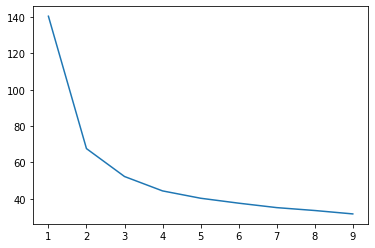

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics

# Using min max scaler to scale the features for better model fit
scaler = MinMaxScaler()
model = scaler.fit(world_data_cleaned.iloc[:,0:16])
scaled_data = model.transform(world_data_cleaned.iloc[:,0:16])
scaled_df = pd.DataFrame(scaled_data)

result = []
for i in range(1,10):
  elbowdata = KMeans(n_clusters=i)

  elbowdata.fit(scaled_data)
  result.append(elbowdata.inertia_)

sns.lineplot(y = result, x= range(1,10))

shs = []
for i in range(2,10):
  kmeans = KMeans(n_clusters=i)

  kmeans.fit(scaled_data)
  
  print('Cluster : {}'.format(i))
  
  print('SHScore: {}'.format(str(metrics.silhouette_score(scaled_data, kmeans.labels_))))

#### Since highest Silhouette is obtained at K = 2

#### For K = 2 clusters

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Using min max scaler to scale the features for better model fit
scaler = MinMaxScaler()
model = scaler.fit(world_data_cleaned.iloc[:,0:16])
scaled_data = model.transform(world_data_cleaned.iloc[:,0:16])
scaled_df = pd.DataFrame(scaled_data)

# Kmeans clustering model
km = KMeans(n_clusters=2)
km.fit_predict(scaled_data)
print(km.labels_)
#print("\n")
#print("Accuracy Score :",accuracy_score(df_1['Class'],km.labels_))
#print("F1 Score :", f1_score(df_1['Class'], km.labels_, average="macro"))
#print("Adjusted Random Index :",adjusted_rand_score(df_1['Class'],km.labels_))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1
 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
# To Find which countries belong to which classes
world_data_cleaned['Clusters_KM'] = km.labels_

# Group countries based on 0 and 1
group_0 = world_data_cleaned[world_data_cleaned['Clusters_KM'] == 0]
group_1 = world_data_cleaned[world_data_cleaned['Clusters_KM'] == 1]

print("Cluster 1:",list(group_0.Country))
print("Cluster 2:",list(group_1.Country))


Cluster 1: ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe', 'Afghanistan', 'Bangladesh', 'Bhutan', 'Cambodia', 'India', 'Indonesia', 'Kyrgyz Republic', 'Lao PDR', 'Mongolia', 'Myanmar', 'Nepal', 'Pakistan', 'Philippines', 'Tajikistan', 'Timor-Leste', 'Turkmenistan', 'Uzbekistan', 'Iraq', 'Syrian Arab Republic', 'Yemen, Rep.', 'Kiribati', 'Marshall Islands', 'Micronesia, Fed. Sts.', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Vanuatu',

In [ ]:
# CH and Dunn Index for K-Means
from validclust import dunn
from sklearn.metrics import pairwise_distances
from sklearn import metrics

dist_cohesive = pairwise_distances(scaled_data)
dunn_cohesive = dunn(dist_cohesive,  km.labels_)
print("For K = 2 :\n")
print("Dunn Index :"+str(dunn_cohesive))
print('CH Index: '+ str(metrics.calinski_harabasz_score(scaled_data, km.labels_)))

For K = 2 :

Dunn Index :0.15632748303920252
CH Index: 126.42219782157389


In [ ]:
##### INTERNAL VALIDATION METHODS #####
!pip install validclust

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


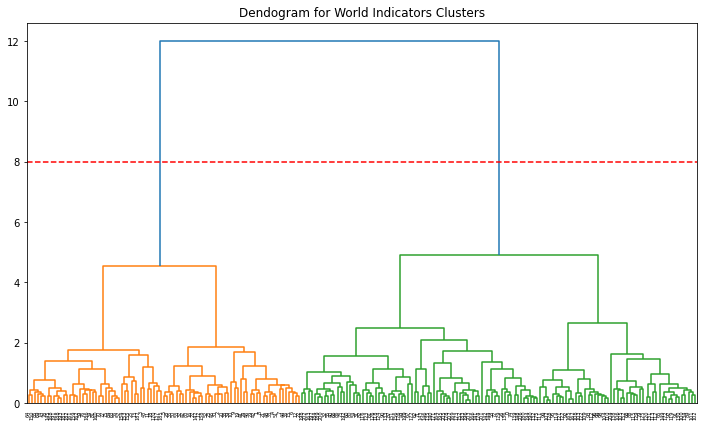

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt


mdlh=AgglomerativeClustering(n_clusters=2, linkage='ward')
mdlh.fit(scaled_df)
print(mdlh.labels_)

plt.title("Dendogram for World Indicators Clusters")

Z1 = AgglomerativeClustering(n_clusters=2, linkage='ward')

dend = shc.dendrogram(shc.linkage(scaled_df.iloc[:,0:16], method='ward'))

plt.axhline(y=8, color='r', linestyle='--')
plt.gcf().set_size_inches(12,7)

In [ ]:
# To Find which countries belong to which classes
world_data_cleaned['Clusters_H'] = mdlh.labels_

# Group countries based on 0 and 1
group_0 = world_data_cleaned[world_data_cleaned['Clusters_H'] == 0]
group_1 = world_data_cleaned[world_data_cleaned['Clusters_H'] == 1]

print("Cluster 1:",list(group_0.Country))
print("Cluster 2:",list(group_1.Country))


Cluster 1: ['Algeria', 'Libya', 'Mauritius', 'Morocco', 'Seychelles', 'Tunisia', 'Armenia', 'Azerbaijan', 'Brunei Darussalam', 'China', 'Georgia', 'Hong Kong SAR, China', 'Japan', 'Kazakhstan', 'Korea, Dem. Rep.', 'Korea, Rep.', 'Macao SAR, China', 'Malaysia', 'Maldives', 'Mongolia', 'Singapore', 'Sri Lanka', 'Thailand', 'Vietnam', 'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Faeroe Islands', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Isle of Man', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macedonia, FYR', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'San Marino', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Bahrain', 'Iran, Islamic Rep.', 'Israel', 'Jordan', 'Kuwait'

In [ ]:
from validclust import dunn
from sklearn.metrics import pairwise_distances
from sklearn import metrics

dist_cohesive = pairwise_distances(scaled_data)
dunn_cohesive = dunn(dist_cohesive,  mdlh.labels_)
print("For K = 2 :\n")
print("Dunn Index :"+str(dunn_cohesive))
print('CH Index: '+ str(metrics.calinski_harabasz_score(scaled_data, mdlh.labels_)))

For K = 2 :

Dunn Index :0.17982538240882745
CH Index: 117.26585378203762


#### Scatter Plot for GDP vs Infant Mortality Rate

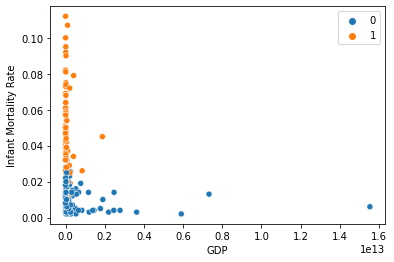

In [ ]:
# Scatter plot for GDP vs Infant Mortality

sns.scatterplot(x='GDP', y='Infant Mortality Rate',hue=mdlh.labels_, data=world_data_cleaned)

#### Scatter plot for Birth Rate vs Female Life Expectancy

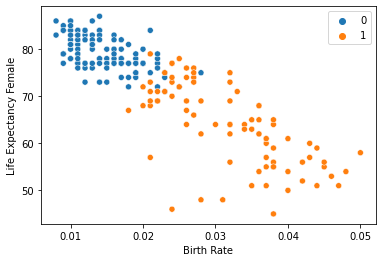

In [ ]:
# Scatter plot for Birth Rate vs Female Life Expectancy

sns.scatterplot(x='Birth Rate', y='Life Expectancy Female',hue=mdlh.labels_, data=world_data_cleaned)

#### Scatter plot for Mobile Phone Usage vs Internet Usage

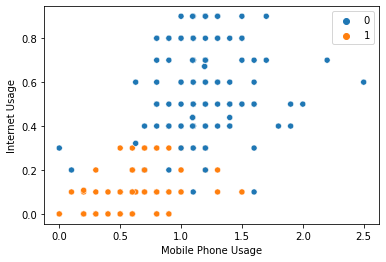

In [ ]:
# Scatter plot for Mobile Phone Usage vs Internet Usage

sns.scatterplot(x='Mobile Phone Usage', y='Internet Usage',hue=mdlh.labels_, data=world_data_cleaned)

In [ ]:
from validclust import dunn
from sklearn.metrics import pairwise_distances
from sklearn import metrics

dist_cohesive_km = pairwise_distances(scaled_data)
dunn_cohesive_km = dunn(dist_cohesive,  km.labels_)

dist_cohesive_h = pairwise_distances(scaled_data)
dunn_cohesive_h = dunn(dist_cohesive,  mdlh.labels_)

print("For KMeans:\n")
print("Dunn Index :"+str(dunn_cohesive_km))
print('CH Index: '+ str(metrics.calinski_harabasz_score(scaled_data, km.labels_)))

print("\nFor Hierarchial Clustering:\n")
print("Dunn Index :"+str(dunn_cohesive_h))
print('CH Index: '+ str(metrics.calinski_harabasz_score(scaled_data, mdlh.labels_)))

For KMeans:

Dunn Index :0.15632748303920252
CH Index: 126.42219782157389

For Hierarchial Clustering:

Dunn Index :0.17982538240882745
CH Index: 117.26585378203762


## From the above Internal Validation metrics we can say that the Hierarchial Clustering Method performs better on this Dataset compared to K-Means

################################################################################


### Additional Steps - 
####You can see if we take the highest Silhouette Score viz at K = 2, we don't get that good clusters. Countries which are both developed and developing are placed in a single cluster. 
#### This can be overcome by creating better clusters at K = 5 as Silhouettes are comparably good for 5 too

In [ ]:
### K Means Clustering for K = 5
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Using min max scaler to scale the features for better model fit
scaler = MinMaxScaler()
model = scaler.fit(world_data_cleaned.iloc[:,0:16])
scaled_data = model.transform(world_data_cleaned.iloc[:,0:16])
scaled_df = pd.DataFrame(scaled_data)

# Kmeans clustering model
km = KMeans(n_clusters=5)
km.fit_predict(scaled_data)
print(km.labels_)

[3 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 1 3 1 1 1 1 1 1 1 0 1 1 1 1 2 0 1 3 1 1
 1 3 1 0 1 1 3 1 1 1 1 1 0 1 1 1 1 0 0 3 3 0 3 2 2 0 3 3 4 0 3 4 3 3 0 0 0
 3 3 3 3 3 0 3 3 2 1 3 3 2 2 4 4 2 4 2 2 2 2 2 4 2 2 4 4 4 4 2 4 4 2 4 2 2
 2 2 4 2 4 2 4 2 4 4 2 2 2 2 4 2 2 2 4 4 4 0 2 4 0 0 3 0 0 0 0 0 0 0 3 0 1
 0 4 3 0 0 3 3 3 0 4 1 3 3 3 3 2 0 2 0 2 3 0 3 0 4 0 0 0 0 2 0 0 0 0 3 0 3
 3 3 3 3 0 0 3 0 3 0 0 0 2 2 0 0 0 2 0 4 0 0 0]


[0 1 1 3 1 1 1 1 1 1 1 3 1 3 3 1 1 1 3 1 1 1 1 1 1 3 0 1 1 1 1 0 0 1 3 1 1
 1 1 1 0 1 1 3 1 1 1 1 1 0 1 1 1 1 0 0 3 3 0 3 0 0 0 3 3 2 0 0 2 3 3 0 0 0
 0 3 3 3 3 2 0 3 0 1 3 3 0 0 2 2 0 2 4 4 4 4 4 2 4 4 2 2 2 4 4 2 2 4 4 4 4
 4 4 2 4 2 0 2 0 2 2 4 4 0 0 2 0 4 4 2 2 2 0 0 2 0 0 3 2 0 0 0 0 0 0 3 0 1
 0 2 3 0 0 3 3 3 0 2 1 3 3 3 3 0 0 4 0 4 3 0 3 0 2 0 0 0 0 0 0 0 0 3 3 0 0
 3 3 3 3 0 0 3 0 3 0 0 0 0 0 0 0 0 0 0 2 0 0 0]


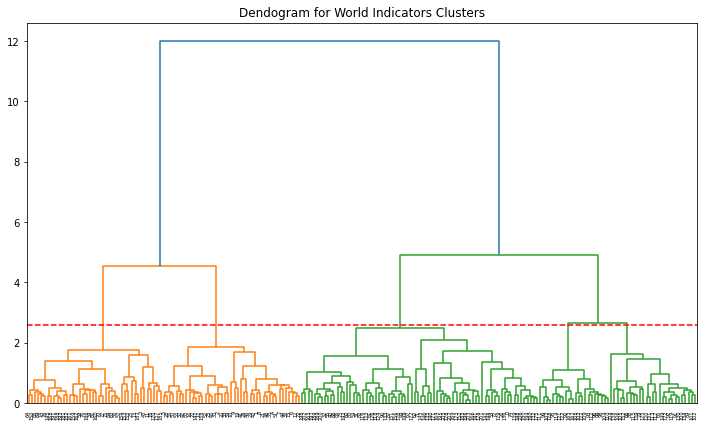

In [ ]:
# Hierarchial Clustering For K = 5
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt


mdlh=AgglomerativeClustering(n_clusters=5, linkage='ward')
mdlh.fit(scaled_df)
print(mdlh.labels_)

plt.title("Dendogram for World Indicators Clusters")

Z1 = AgglomerativeClustering(n_clusters=5, linkage='ward')

dend = shc.dendrogram(shc.linkage(scaled_df.iloc[:,0:16], method='ward'))

plt.axhline(y=2.6, color='r', linestyle='--')
plt.gcf().set_size_inches(12,7)

In [ ]:
from validclust import dunn
from sklearn.metrics import pairwise_distances
from sklearn import metrics

dist_cohesive_km = pairwise_distances(scaled_data)
dunn_cohesive_km = dunn(dist_cohesive,  km.labels_)

dist_cohesive_h = pairwise_distances(scaled_data)
dunn_cohesive_h = dunn(dist_cohesive,  mdlh.labels_)

print("For KMeans:\n")
print("Dunn Index :"+str(dunn_cohesive_km))
print('CH Index: '+ str(metrics.calinski_harabasz_score(world_data_cleaned.iloc[:,0:16], km.labels_)))

print("\nFor Hierarchial Clustering:\n")
print("Dunn Index :"+str(dunn_cohesive_h))
print('CH Index: '+ str(metrics.calinski_harabasz_score(world_data_cleaned.iloc[:,0:16], mdlh.labels_)))

For KMeans:

Dunn Index :0.15632748303920252
CH Index: 8.288869537907464

For Hierarchial Clustering:

Dunn Index :0.17982538240882745
CH Index: 7.250601142950487


#### Since the Dunn Index and CH Index for Hierarchial Clustering method for K = 5 seems more promising, let's move forward to see whcih countries belong to the 5 clusters.

In [ ]:
# To Find which countries belong to which classes
world_data_cleaned['Clusters'] = mdlh.labels_

# Group countries based on 0 and 1
group_0 = world_data_cleaned[world_data_cleaned['Clusters'] == 0]
group_1 = world_data_cleaned[world_data_cleaned['Clusters'] == 1]
group_2 = world_data_cleaned[world_data_cleaned['Clusters'] == 2]
group_3 = world_data_cleaned[world_data_cleaned['Clusters'] == 3]
group_4 = world_data_cleaned[world_data_cleaned['Clusters'] == 4]
print("Cluster 1:",list(group_0.Country))
print("Cluster 2:",list(group_1.Country))
print("Cluster 3:",list(group_2.Country))
print("Cluster 4:",list(group_3.Country))
print("Cluster 5:",list(group_4.Country))

Cluster 1: ['Algeria', 'Libya', 'Mauritius', 'Morocco', 'Seychelles', 'Tunisia', 'Armenia', 'Azerbaijan', 'Brunei Darussalam', 'China', 'Georgia', 'Hong Kong SAR, China', 'Kazakhstan', 'Korea, Dem. Rep.', 'Macao SAR, China', 'Malaysia', 'Maldives', 'Mongolia', 'Sri Lanka', 'Thailand', 'Vietnam', 'Albania', 'Belarus', 'Moldova', 'Montenegro', 'Romania', 'Russian Federation', 'Serbia', 'Turkey', 'Ukraine', 'Bahrain', 'Iran, Islamic Rep.', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saudi Arabia', 'United Arab Emirates', 'American Samoa', 'French Polynesia', 'Guam', 'New Caledonia', 'Antigua and Barbuda', 'Argentina', 'Bahamas, The', 'Bermuda', 'Brazil', 'Cayman Islands', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Curacao', 'Dominica', 'Dominican Republic', 'Greenland', 'Grenada', 'Jamaica', 'Mexico', 'Panama', 'Peru', 'Puerto Rico', 'Sint Maarten (Dutch part)', 'St. Kitts and Nevis', 'St. Lucia', 'St. Martin (French part)', 'St. Vincent and the Grenadines', 'Suriname', 'Trinidad an

#### Here we can see that these clusters make more sense as countries with comparable features are clustered together in the same cluster